# WBC

In [1]:
## Necessary packages

import tensorflow as tf

import keras


import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
# from sklearn.preprocessing import normalize
import cv2

/Users/gray/.pyenv/versions/3.6.5/envs/zzy_project/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gray/.pyenv/versions/3.6.5/envs/zzy_project/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gray/.pyenv/versions/3.6.5/envs/zzy_project/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

Verifying that GPU is available

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3857344920986472689
]


## 1. Data preprossing

In [3]:
train_path = "/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TRAIN"
test_path = "/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TEST/"

In [4]:
# train_path = "C:/Users/JT/Desktop/CU Boulder/DS Club/TRAIN/"
# test_path = "C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/"

Reading in the image data

In [5]:
X_train = []
y_train = []
train_fnames = []

for wbctype in os.listdir(train_path):
    for file in os.listdir(os.path.join(train_path,wbctype)): #cycle through the different folders
        X_train.append(cv2.imread(train_path+wbctype+"/"+file)) #read in image file and store image
        y_train.append(wbctype)                                 #store WBC type
        train_fnames.append(train_path+wbctype+"/"+file)        #store file path
        
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
train_fnames = np.asarray(train_fnames)

TypeError: Image data of dtype object cannot be converted to float

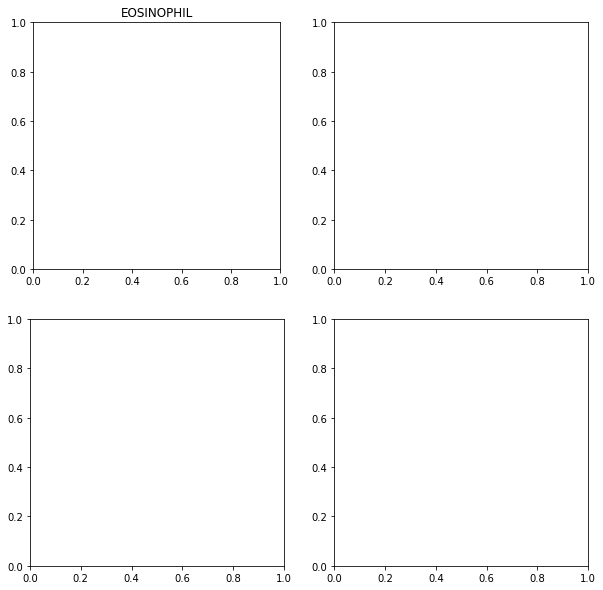

In [6]:
from PIL import Image

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(221)
plt.title(y_train[0])
plt.imshow(X_train[0]); 

plt.subplot(222)
plt.title(y_train[3000])
plt.imshow(X_train[3000]); 

plt.subplot(223)
plt.title(y_train[5000])
plt.imshow(X_train[5000]); 

plt.subplot(224)
plt.title(y_train[8000])
plt.imshow(X_train[8000]); 

sample_images = X_train[[0,3000,5000,8000],:]
sample_labels = y_train[[0,3000,5000,8000]]

Normalizing the image data. There are several techniques that can be used, such as normalizing across each image or normalizing across the entire training dataset. I'm first going to explore normalization across the entire dataset.

In [130]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, featurewise_center=True)

processed_dataset = datagen.flow_from_directory(
    shuffle= True,
    batch_size= 32,
    target_size= (80,80), 
#     directory= 'C:/Users/JT/Desktop/CU Boulder/DS Club/TRAIN'
    directory= '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TRAIN'
)

# datagen.fit(X_train) #machinelearningmastery.com ImageDataGenerator for more info
# datagen.fit(processed_dataset)

Found 9957 images belonging to 4 classes.


In [131]:
processed_dataset

What does a normalized image look like? Let's use the normalization we applied to the entire dataset to just look at our sample images above.

## 2. NN training

In [239]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image
from PIL import Image

# def model():
#     model = Sequential()
#     model.add(Conv2D(80, (4,4), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    
# #     model.add(Conv2D(64, (4,4), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
#     model.add(BatchNormalization())
    
#     model.add(MaxPool2D(pool_size = (2,2)))

#     model.add(Dropout(0.5))
#     model.add(Flatten())

#     model.add(Dense(32, activation = 'relu'))
#     model.add(Dense(16, activation = 'relu'))
#     model.add(Dense(8, activation = 'relu'))
#     model.add(Dense(4, activation = 'softmax'))

#     model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
#     return model


def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(processed_dataset, steps_per_epoch = None, epochs = 30, verbose = 1)
nn.save('Model.h5')

/Users/gray/.pyenv/versions/3.6.5/envs/zzy_project/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/30
312/312 [==============================] - 190s 611ms/step - loss: 1.2794 - accuracy: 0.4155
Epoch 2/30
312/312 [==============================] - 174s 556ms/step - loss: 0.8567 - accuracy: 0.6322
Epoch 3/30
312/312 [==============================] - 173s 554ms/step - loss: 0.5516 - accuracy: 0.7743
Epoch 4/30
312/312 [==============================] - 173s 556ms/step - loss: 0.3643 - accuracy: 0.8579
Epoch 5/30
312/312 [==============================] - 166s 531ms/step - loss: 0.2424 - accuracy: 0.9067
Epoch 6/30
312/312 [==============================] - 164s 525ms/step - loss: 0.1576 - accuracy: 0.9441
Epoch 7/30
312/312 [==============================] - 162s 518ms/step - loss: 0.1033 - accuracy: 0.9629
Epoch 8/30
312/312 [==============================] - 162s 518ms/step - loss: 0.0757 - accuracy: 0.9750
Epoch 9/30
312/312 [==============================] - 239s 767ms/step - loss: 0.0512 - accuracy: 0.9841
Epoch 10/30
312/312 [==============================] - 184s 590m

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 78, 78, 80)        2240      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 26, 26, 80)        0         
_________________________________________________________________
batch_normalization_31 (Batc (None, 26, 26, 80)        320       
_________________________________________________________________
dropout_73 (Dropout)         (None, 26, 26, 80)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 64)        46144     
_________________________________________________________________
dropout_74 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 36864)           

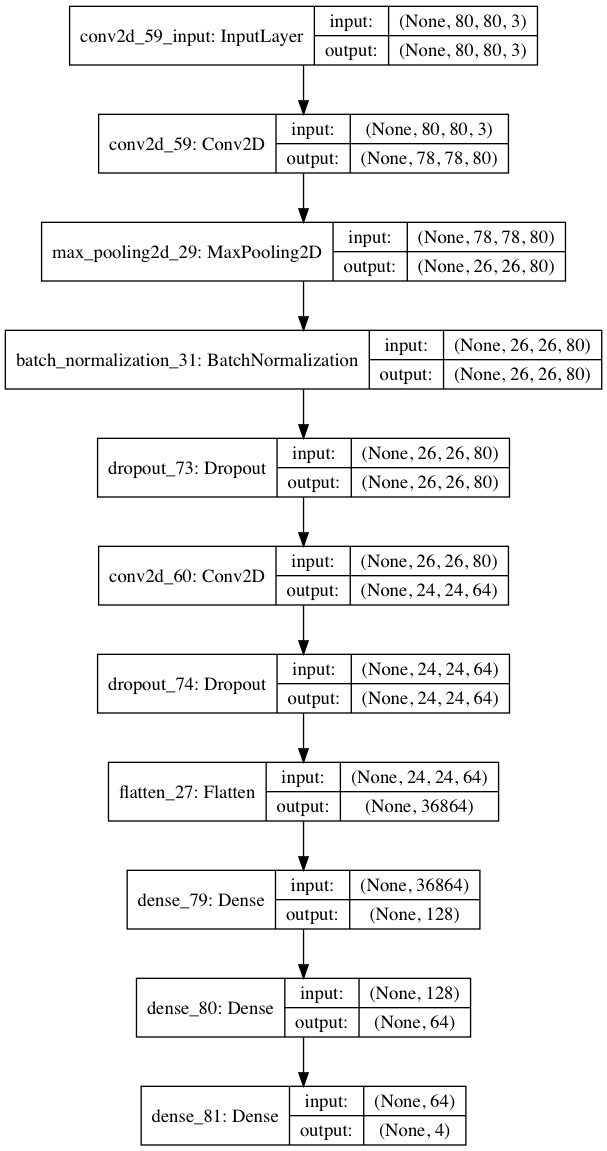

In [240]:
from keras.utils.vis_utils import plot_model
# https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/

print(nn.summary())
plot_model(nn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## 3. Training performance

In [241]:
from keras.models import load_model
import numpy
import os
from PIL import Image

model = load_model('Model.h5')

def training_acc(path):
    correct = 0
    wrong = 0
    total = 0

    cell_type = path.split('/')[-1]
    
    tag = -1
    if cell_type == 'EOSINOPHIL':
        tag = 0
    elif cell_type == 'LYMPHOCYTE':
        tag = 1
    elif cell_type == 'MONOCYTE':
        tag = 2
    elif cell_type == 'NEUTROPHIL':
        tag = 3
    
    if tag == -1:
        exit(0)
    
    for file in os.listdir(path):
        new_image = Image.open(path + '/'+file)
        new_image = new_image.resize((80, 80))
        new_image = numpy.array(new_image, dtype = 'float32')
        new_image/=255
        new_image = new_image.reshape(1, 80, 80, 3)
        prediction = model.predict(new_image)
        #print(numpy.argmax(prediction))
        if numpy.argmax(prediction) == tag: correct+=1
        else: wrong+=1
        total+=1
        
    if cell_type == 'EOSINOPHIL':
        print('EOSINOPHIL :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'LYMPHOCYTE':
        print('LYMPHOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'MONOCYTE':
        print('MONOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'NEUTROPHIL':
        print('NEUTROPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    else:
        print("ERRoR:???")

def test_acc(path):
    correct = 0
    wrong = 0
    total = 0

    cell_type = path.split('/')[-1]
    
    tag = -1
    if cell_type == 'EOSINOPHIL':
        tag = 0
    elif cell_type == 'LYMPHOCYTE':
        tag = 1
    elif cell_type == 'MONOCYTE':
        tag = 2
    elif cell_type == 'NEUTROPHIL':
        tag = 3
    
    if tag == -1:
        exit(0)
    
    for file in os.listdir(path):
        new_image = Image.open(path + '/'+file)
        new_image = new_image.resize((80, 80))
        new_image = numpy.array(new_image, dtype = 'float32')
        new_image/=255
        new_image = new_image.reshape(1, 80, 80, 3)
        prediction = model.predict(new_image)
        #print(numpy.argmax(prediction))
        if numpy.argmax(prediction) == tag: correct+=1
        else: wrong+=1
        total+=1
        
    if cell_type == 'EOSINOPHIL':
        print('EOSINOPHIL :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'LYMPHOCYTE':
        print('LYMPHOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'MONOCYTE':
        print('MONOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'NEUTROPHIL':
        print('NEUTROPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    else:
        print("ERRoR:???")

In [242]:
path_1 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TRAIN_small/EOSINOPHIL'
path_2 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TRAIN_small/LYMPHOCYTE'
path_3 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TRAIN_small/MONOCYTE'
path_4 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TRAIN_small/NEUTROPHIL'

In [243]:
training_acc(path_1)

EOSINOPHIL :::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0


In [244]:
training_acc(path_2)

LYMPHOCYTE :::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0


In [245]:
training_acc(path_3)

MONOCYTE :::: Result :  Correct prediction %:  99.83552631578947 Wrong prediction : % 0.1644736842105263


In [246]:
training_acc(path_4)

NEUTROPHIL ::: Result :  Correct prediction %:  98.76543209876543 Wrong prediction : % 1.2345679012345678


In [247]:
test_1 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TEST/EOSINOPHIL'
test_2 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TEST/LYMPHOCYTE'
test_3 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TEST/MONOCYTE'
test_4 = '/Users/gray/Desktop/zzy_project/dataset2-master/dataset2-master/images/TEST/NEUTROPHIL'

In [248]:
test_acc(test_1)

EOSINOPHIL :::: Result :  Correct prediction %:  63.08186195826645 Wrong prediction : % 36.91813804173354


In [249]:
test_acc(test_2)

LYMPHOCYTE :::: Result :  Correct prediction %:  63.2258064516129 Wrong prediction : % 36.774193548387096


In [250]:
test_acc(test_3)

MONOCYTE :::: Result :  Correct prediction %:  76.61290322580645 Wrong prediction : % 23.387096774193548


In [251]:
test_acc(test_4)

NEUTROPHIL ::: Result :  Correct prediction %:  59.77564102564102 Wrong prediction : % 40.22435897435898


LYMPHOCYTE :::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0


MONOCYTE :::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0


NEUTROPHIL ::: Result :  Correct prediction %:  99.95998399359743 Wrong prediction : % 0.040016006402561026


In [34]:
#demo code check for LYMPHOCYTE

correct = 0
wrong = 0
total = 0

for file in os.listdir('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/LYMPHOCYTE'):
  image = Image.open('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/LYMPHOCYTE/'+file)
  image = image.resize((80, 80))
  image = numpy.array(image, dtype = 'float32')
  image/=255
  image = image.reshape(1, 80, 80, 3)
  prediction = model.predict(image)
  #print(numpy.argmax(prediction))
  if numpy.argmax(prediction) == 1: correct+=1
  else: wrong+=1
  total+=1

print('LYMPHOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)

#demo code check for MONOCYTE

correct = 0
wrong = 0
total = 0

for file in os.listdir('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/MONOCYTE'):
  image = Image.open('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/MONOCYTE/'+file)
  image = image.resize((80, 80))
  image = numpy.array(image, dtype = 'float32')
  image/=255
  image = image.reshape(1, 80, 80, 3)
  prediction = model.predict(image)
  #print(numpy.argmax(prediction))
  if numpy.argmax(prediction) == 2: correct+=1
  else: wrong+=1
  total+=1

print('MONOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)


#demo code check for NEUTROPHIL

correct = 0
wrong = 0
total = 0

for file in os.listdir('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/NEUTROPHIL'):
  image = Image.open('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/NEUTROPHIL/'+file)
  image = image.resize((80, 80))
  image = numpy.array(image, dtype = 'float32')
  image/=255
  image = image.reshape(1, 80, 80, 3)
  prediction = model.predict(image)
  #print(numpy.argmax(prediction))
  if numpy.argmax(prediction) == 3: correct+=1
  else: wrong+=1
  total+=1

print('NEUTROPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)

correct = 0
wrong = 0
total = 0

for file in os.listdir('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/EOSINOPHIL'):
  image = Image.open('C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/EOSINOPHIL/'+file)
  image = image.resize((80, 80))
  image = numpy.array(image, dtype = 'float32')
  image/=255
  image = image.reshape(1, 80, 80, 3)
  prediction = model.predict(image)
  #print(numpy.argmax(prediction))
  if numpy.argmax(prediction) == 0: correct+=1
  else: wrong+=1
  total+=1
print('EOSINOPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)


LYMPHOCYTE :::: Result :  Correct prediction %:  98.06451612903226 Wrong prediction : % 1.935483870967742
MONOCYTE :::: Result :  Correct prediction %:  76.77419354838709 Wrong prediction : % 23.225806451612904
NEUTROPHIL ::: Result :  Correct prediction %:  78.36538461538461 Wrong prediction : % 21.634615384615387
EOSINOPHIL ::: Result :  Correct prediction %:  67.57624398073835 Wrong prediction : % 32.42375601926163


In [ ]:
# sample_batch = datagen.flow(sample_images, sample_labels, batch_size=32, shuffle=False)

In [ ]:
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# for i in np.arange(4):
#     plt.subplot(220+(i+1))
#     plt.title(sample_batch[0][1][i]) 
#     plt.imshow((sample_batch[0][0][i]*255).astype(np.uint8))

In [ ]:
# no_noise = []
# for i in range(len(sample_images)):
#     blur = cv2.GaussianBlur(sample_batch[0][1][i], (5, 5), 0)
#     no_noise.append(blur)

# fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    
# image = no_noise[1]
# plt.subplot(211)
# plt.imshow(image)

# plt.subplot(212)
# plt.imshow(sample_images[1])

Next, let's separate our background from our foreground (in this case our cell(s) of interest).

In [ ]:
# # Segmentation
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# for i in np.arange(4):
#     gray = cv2.cvtColor(sample_batch[0][0][i], cv2.COLOR_RGB2GRAY).astype('uint8')
# #    gray = cv2.GaussianBlur(gray, (5, 5), 0)
#     gray = cv2.bilateralFilter(gray,9,75,75)

#     ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#     #ret, thresh = cv2.AdaptiveThreshold()

#     plt.subplot(220+(i+1))
#     plt.title(sample_batch[0][1][i]) 
#     plt.imshow(gray)

In [ ]:
# # Segmentation
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# for i in np.arange(4):
#     gray = cv2.cvtColor(sample_batch[0][0][i], cv2.COLOR_RGB2GRAY).astype('uint8')
#     #gray = cv2.GaussianBlur(gray, (5, 5), 0)

#     ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#     #ret, thresh = cv2.AdaptiveThreshold()

#     plt.subplot(220+(i+1))
#     plt.title(sample_batch[0][1][i]) 
#     plt.imshow(gray)